In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

# A Data Riddle

The Riddler is a weekly column at [fivethirtyeight](https://fivethirtyeight.com/), where they offer puzzles on maths, logic and probability. These puzzles are often solved using data analysis approaches. 

The following puzzle could originally be found [here](https://fivethirtyeight.com/features/are-you-the-best-warlord/). The puzzle received submissions from around 1500 users, and their submissions are available [here](https://github.com/fivethirtyeight/data/blob/master/riddler-castles/castle-solutions-3.csv).

___
#### Are you The Best Warlord?

In a distant, war-torn land, there are two warlords: you and your archenemy.

In this land, there are ten castles. Each castle has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, …, 9, and 10 victory points (corresponding to the castle number). This means there are 50 victory points in total up for grabs points in the war.

You and your enemy each have 100 soldiers to distribute, any way you like, to fight at any of the ten castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. If you each send the same number of troops, you split the points. 

You don’t know what distribution of forces your enemy has chosen until the battles begin. Whoever wins the most points wins the war.
___

In the exercises for today you will be working with these submitted solutions to the puzzle, which can be found in `submissions.txt`.

The file has the following variables:

| Column index | Variable | Definition |
| -:- | :- | :- | 
| 0 | Castle 1 | The number of troops deployed to the castle |
| 1 | Castle 2 | The number of troops deployed to the castle |
| 2 | Castle 3 | The number of troops deployed to the castle |
| 3 | Castle 4 | The number of troops deployed to the castle |
| 4 | Castle 5 | The number of troops deployed to the castle |
| 5 | Castle 6 | The number of troops deployed to the castle |
| 6 | Castle 7 | The number of troops deployed to the castle |
| 7 | Castle 8 | The number of troops deployed to the castle |
| 8 | Castle 9 | The number of troops deployed to the castle |
| 9 | Castle 10 | The number of troops deployed to the castle |
| 10 | Why did you choose your troop deployment? | String containing the reasoning behind the submission |


### 13.0. Load the data and convert it to a numpy array
Inspect the `submissions.txt` file and read through the provided function below to understand what each line does

Once you've done that, apply the function to the `submissions.txt` file and convert the resulting data structure into a numpy array which you will use for the rest of the exercises.

In [3]:
def read_csv(filepath):
    output = []
    regex = "^\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+"
    with open(filepath, "r", errors="replace") as file:
        lines = file.readlines()
    for line in lines:
        regex_find = re.search(regex,line)
        if regex_find:
            line = regex_find.group() 
            line = line.split(",") 
            line = [int(value) for value in line]
            output.append(line)
    return output

In [4]:
data = read_csv('submissions.txt')

### 13.1. Clean the data

We know that there are supposed to be 100 deployed troops in total per submission. This is not the case for all of the submissions, however, so we need to clean the data.

Extract the rows where the sum over all the castles of the row is 100 and store your cleaned data in a new numpy array. 
___

Clean data array shape: `(1321,10)`

In [5]:
data = [i for i in data if sum(i) == 100]
data = np.array(data)
data.shape

(1321, 10)

### 13.2. Find the mean and standard deviation of each castle's number of deployed troops
Hint: Check the jupyter notebook from today's lecture.

For each castle, fit the distribution as a normal distribution (using `stats.norm.fit`) and obtain its mean, `mu`, and standard deviation, `sigma`. 
___

For `Castle 1`, at column index 0, you should get mu `2.025` and sigma `3.875`.

In [19]:
mylist = []
for i in range(len(data[0,:])):
    mu, sigma = stats.norm.fit(data[:,i])
    mylist.append((mu,sigma))
#or for i in data.T: (this transforms it into 10 rows of 1321 elements where every row is one castle)
#or [stats.norm.fit(castle) for castle in data.T]
mus_sigmas = np.array(mylist)
mus_sigmas

array([[ 1.93868282,  3.7038386 ],
       [ 2.65934898,  2.96952819],
       [ 4.05450416,  3.88849851],
       [ 6.91824375,  5.77585163],
       [ 9.16881151,  7.16810979],
       [12.00908403,  8.19177275],
       [13.5003785 ,  9.66596728],
       [16.89023467, 10.73065338],
       [17.31112793, 12.82742633],
       [15.54958365, 13.3879685 ]])

### 13.3. Plot histogram and corresponding normal distribution
Hint: Check the lecture jupyter notebook

For the castle (column) with the **highest mean value**, plot the histogram and the corresponding normal distribution. This normal distribution can be obtained using `stats.norm.fit()`.

Text(0.5, 1.0, 'Histogram and normal distribution of soldiers put into the castle 8')

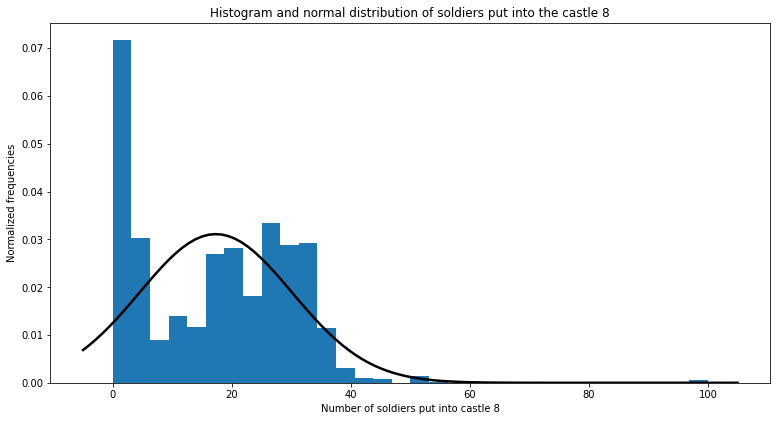

In [157]:
find_index = np.where(mus_sigmas == max(mus_sigmas[:,0]))
x = find_index[0][0] # so this is the 8th castle
data_from_8th_castle = data[:,x]

#np.histogram(data_from_8th_castle)
mu, sigma = mus_sigmas[8]

fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([2,2,1,1]) #left,bottom,width,height. Width and height are in percentage (1 means 100%)

#xmin, xmax = axes.get_xlim()
plt.hist(data_from_8th_castle,bins = 32, density = True)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,sigma)
axes.plot(x,p,'k',linewidth =2.5)
axes.set_xlabel('Number of soldiers put into castle 8')
axes.set_ylabel('Normalized frequencies')
axes.set_title('Histogram and normal distribution of soldiers put into the castle 8')
#plt.plot(x,p,'k')






### 13.4. Plot histogram and corresponding normal distribution
Hint: Check the lecture jupyter notebook

For the castle (column) with the **lowest standard deviation value**, plot the histogram and the corresponding normal distribution. This normal distribution can be obtained using `stats.norm.fit()`.

Text(0.5, 1.0, 'Histogram and normal distribution of soldiers put into the castle 2')

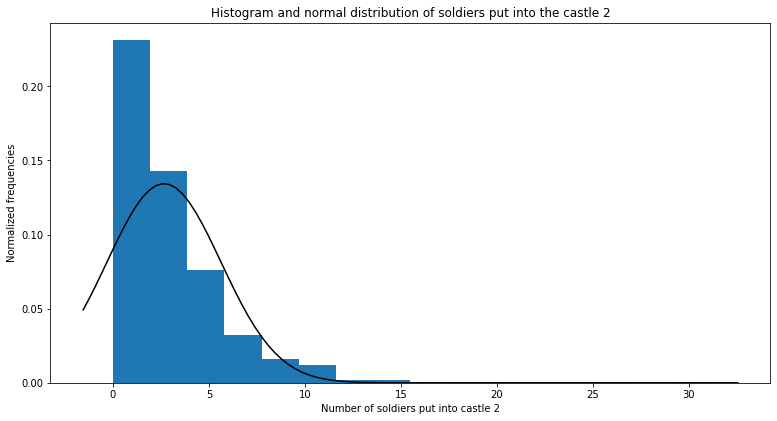

In [249]:
lowest_std = np.where(mus_sigmas == min(mus_sigmas[:,1]))
lowest_std_index = lowest_std[0][0] #so it is the second castle

data_for_1st = data[:,lowest_std_index]

fig = plt.figure(figsize = (10,5)).add_axes([0,0,1,1])
fig.hist(data_for_1st,bins=16,density=True)

mu,sigma = mus_sigmas[lowest_std_index]
xmin,xmax = fig.get_xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,sigma)
fig.plot(x,p,'k')
fig.set_xlabel('Number of soldiers put into castle 2')
fig.set_ylabel('Normalized frequencies')
fig.set_title('Histogram and normal distribution of soldiers put into the castle 2')




### 13.5. Plot histogram and corresponding normal distribution
Hint: Check the lecture jupyter notebook

For the castle (column) with the **highest standard deviation value**, plot the histogram and the corresponding normal distribution. This normal distribution can be obtained using `stats.norm.fit()`.

Figure(720x360)


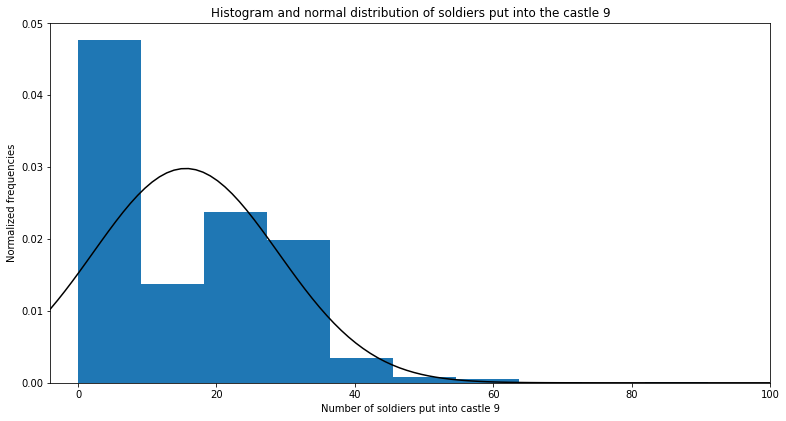

In [301]:
highest_std = np.where(mus_sigmas == max(mus_sigmas[:,1]))
highest_std_index = highest_std[0][0]
data_from_9th = data[:,highest_std_index]

mu,sigma = mus_sigmas[highest_std_index]
fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0,0,1,1])

axes.hist(data_from_9th, density = True)
axes.set_xlim(-4,100)
xmin,xmax = axes.get_xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x, mu,sigma)
axes.set_xlabel('Number of soldiers put into castle 9')
axes.set_ylabel('Normalized frequencies')
axes.set_title('Histogram and normal distribution of soldiers put into the castle 9')
axes.plot(x,p,'k')

### 13.6. Check if the above data distributions are good fits as normal distribution 
Hint: Check the lecture jupyter notebook

Plot the Q-Q plots for the three castles from the prior exercises and verify, and if the above data distributions are good fits as normal distribution.

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


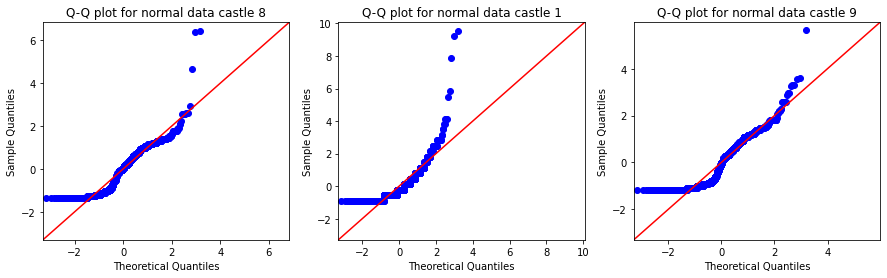

In [305]:
import statsmodels.api as sm  # For the Q-Q plot
import scipy.stats as stats  # For generating random data and for fitting
# fig = plt.figure(figsize = (5,5))
# axes = fig.add_axes([0,0,1,1])
# sm.qqplot(data_from_8th_castle, stats.norm, fit=True, line='45',ax=axes)
# axes.grid()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
print(axes)

axes[0].set_title("Q-Q plot for normal data castle 8");
sm.qqplot(data_from_8th_castle, stats.norm, fit=True, line='45',ax=axes[0]);

axes[1].set_title("Q-Q plot for normal data castle 1");
sm.qqplot(data_for_1st, stats.norm, fit=True, line='45',ax=axes[1]);

axes[2].set_title("Q-Q plot for normal data castle 9");
sm.qqplot(data_from_9th, stats.norm, fit=True, line='45',ax=axes[2]);

### 13.7. Find the mode(s) and median for each of the 10 castles

Hint: 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
- https://numpy.org/doc/stable/reference/generated/numpy.median.html

___
Mode: `[[ 1,  1,  1,  1,  1,  0,  0, 20,  0,  0]]`
Median: `[ 1.  2.  3.  6.  9. 12. 14. 18. 18. 14.]`

In [333]:
castles = data.T #now instead a castle 1 being the column 1, castle 1 is the row 1
medians = [np.median(i) for i in castles]
modes = [stats.mode(i)[0] for i in castles]
modes2 = [i[0] for i in modes]
print("Modes:",modes2)
print("Medians:",medians)

Modes: [1, 1, 1, 1, 0, 0, 0, 15, 0, 0]
Medians: [1.0, 2.0, 3.0, 6.0, 9.0, 12.0, 14.0, 18.0, 18.0, 15.0]


### 13.8. Calculate the scores for all of the potential 'battles' of each player
For each submission (row), compare it with every other row and calculate the score for each player in each of the simulated 'battles'.

The result will be 1321x1321 matrix. Each value at position (i,j) in the matrix will represent the score of player i in the battle against player j. So the first value in the first row is the result of submission 0 against itself, the second value in the first row is the result of submission 0 against submission 1, etc.

Recall the rules:

- The castles are worth 1, 2, 3, …, 9, and 10 victory points (corresponding to the castle number).
- Whoever sends more soldiers to a given castle conquers that castle and wins its victory points.
- If you each send the same number of troops, you split the points equally.

Remember there are 50 points at stake in each 'battle'. This means that the sum of (i,j) and (j,i) should be 50. Check that this holds for your finished matrix.

The matrix will contain the value `22.5` along the diagonal (because you are of course evenly matched with yourself as an oponent). 
___

The player with the submission in the original row 0 in the data (who is therefore also at row 0 in the score matrix) has the following scores: 

`[22.5, 27. , 17. , ..., 22. , 21. , 30. ]`

In [473]:
array = np.zeros((1321,1321))
for i in range(len(data[:,0])):
    for j in range(len(data[:,0])):
        if np.all(data[i] == data[j]):
            array[i][j] = 22.5
        else:
            mask = data[i] > data[j]
            indices = np.where(mask == True)
            indices2 = np.where(mask == False)
            array[j][i] = sum(indices2[0])
            array[i][j] = sum(indices[0])

array

# for i in range(1321):
#     for j in range(1321):
#         if array[i][j] == 22.5:
#             print("yes")
# mask = data[1] < data[0]
# indices = np.where(mask == True)
# sum(indices[0])

# mask = data[0] == data[0]
# np.all(mask)

array([[22.5, 27. , 19. , ..., 23. , 21. , 30. ],
       [18. , 22.5, 18. , ..., 19. , 19. , 21. ],
       [26. , 27. , 22.5, ..., 21. , 26. , 15. ],
       ...,
       [22. , 26. , 24. , ..., 22.5, 16. , 23. ],
       [24. , 26. , 19. , ..., 29. , 22.5, 21. ],
       [15. , 24. , 30. , ..., 22. , 24. , 22.5]])

### 13.9. Calculate the number of wins, ties, and losses for each of the submissions
 
The result should be a 1321x3 matrix with the three columns `[wins ties losses]`.
___
Result for submission at row 0: `[754, 17, 550]`

In [586]:
# mylist = []
# for i in range(len(data[:,0])):
#     ties = 0
#     wins = 0
#     loses= 0
#     for j in range(len(data[:,0])):
#         if np.all(data[i] == data[j]):
#             ties = ties + 1
#         elif np.any(data[i] > data[j]):
#             wins = wins + 1
#         else:
#             loses = loses+1
#     mylist.append([wins,ties,loses])
# mylist = []

# for i, row in enumerate(array):
#     results = [0,0,0] #[wins,ties,loses]
#     for j, res in enumerate(row):
#         if res > array[j,i]:
#             results[0] += 1
#         elif res < array[j,i]:
#             results[2] += 1
#         else:
#             results[1] += 1
#     mylist.append(results)

# mylist
# mylist = []
# for i in range(len(data[:,0])):
#     ties = 0
#     wins = 0
#     loses= 0
#     for j in range(len(data[:,0])):
#         mask1 = data[i] == data[j]
#         ties = ties + len([x for x in mask1 if x ==True])   
#         mask2 = data[i] > data[j]
        
#         wins = wins + len([x for x in mask2 if x == True])
#         loses = loses + len([x for x in mask2 if x == False])
#     mylist.append([wins,ties,loses])

# mylist
        
results = []
for i, row in enumerate(array):
    result = [0,0,0] # wins, draws, losses
    for j, res in enumerate(row):
        if res > array[j,i]:
            result[0] += 1
        elif res < array[j,i]:
            result[2] += 1
        else:
            result[1] += 1
    results.append(result)
results=np.array(results)
        
    




In [587]:
results

array([[857,   1, 463],
       [338,   1, 982],
       [855,   1, 465],
       ...,
       [801,   3, 517],
       [712,   1, 608],
       [801,   1, 519]])

### 13.10. Plot the histogram based on the number of wins per submission
Hint: Check the lecture jupyter notebook

(array([ 20.,  31.,  31.,  64., 212., 349., 318., 224.,  62.,  10.]),
 array([1.0000e+00, 1.1560e+02, 2.3020e+02, 3.4480e+02, 4.5940e+02,
        5.7400e+02, 6.8860e+02, 8.0320e+02, 9.1780e+02, 1.0324e+03,
        1.1470e+03]),
 <BarContainer object of 10 artists>)

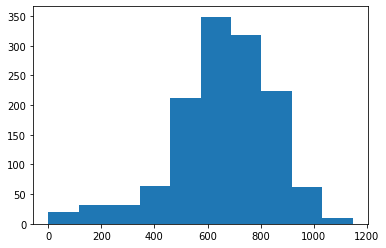

In [588]:
plt.hist(results[:,0])

### 13.11. Plot the histogram based on the number of losses per submission
Hint: Check the lecture jupyter notebook


(array([ 10.,  62., 224., 318., 349., 220.,  56.,  31.,  31.,  20.]),
 array([ 173. ,  287.6,  402.2,  516.8,  631.4,  746. ,  860.6,  975.2,
        1089.8, 1204.4, 1319. ]),
 <BarContainer object of 10 artists>)

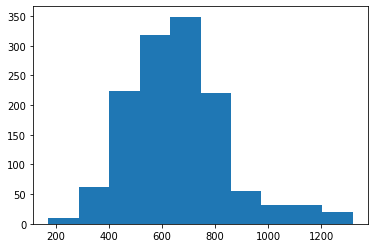

In [589]:
plt.hist(results[:,2])

### 13.12. Check if the distributions in exercise 13.10 and 13.11 follow a normal distribution
Hint: Make QQ plots (check the lecture notebook)

ta


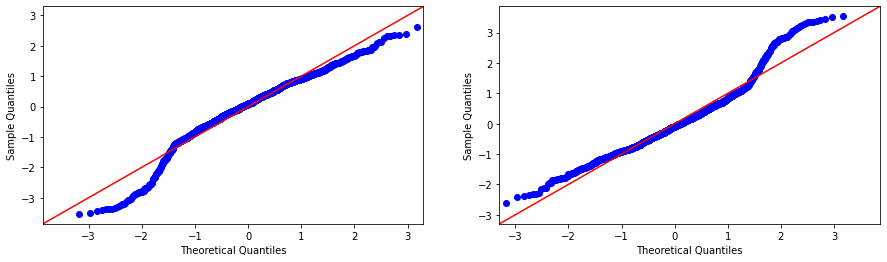

In [597]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))


sm.qqplot(results[:,0], stats.norm, fit=True, line='45',ax=axes[0])
sm.qqplot(results[:,2], stats.norm, fit=True, line='45',ax=axes[1])

print("ta")


### 13.13. Find the top 5 submissions based on their number of wins
Hint: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

Find the indices of the 5 submissions with the highest number of wins.
___
Indices: `609, 805, 178, 1222, 470`

In [635]:
top5 = results[results[:,0].argsort()[::-1]]
results[results[:,0].argsort()[::-1]]

array([[1147,    1,  173],
       [1106,    1,  214],
       [1100,    1,  220],
       ...,
       [  23,    1, 1297],
       [  11,    1, 1309],
       [   1,    1, 1319]])

In [633]:
top5[:5]

array([[1147,    1,  173],
       [1106,    1,  214],
       [1100,    1,  220],
       [1096,    2,  223],
       [1091,    1,  229]])